In [1]:
import tensorflow as tf
import time

In [2]:
size = 500
W = tf.random_normal([size, size], name='W')
X = tf.random_normal([size, size], name='X')
mul = tf.matmul(W, X, name='mul')
sum_result = tf.reduce_sum(mul, name='sum')

with tf.Session() as sess:
    result = sess.run(sum_result)
print('result=', result)

result= -1893.1455


In [3]:
size = 500
W = tf.random_normal([size, size], name='W')
X = tf.random_normal([size, size], name='X')
mul = tf.matmul(W, X, name='mul')
sum_result = tf.reduce_sum(mul, name='sum')

tfconfig = tf.ConfigProto(log_device_placement = True)
with tf.Session(config = tfconfig) as sess:
    result = sess.run(sum_result)

print('result=', result)    

result= 2921.2793


In [4]:
size = 500
with tf.device("/cpu:0"):
    W = tf.random_normal([size, size], name='W')
    X = tf.random_normal([size, size], name='X')
    mul = tf.matmul(W, X, name='mul')
    sum_result = tf.reduce_sum(mul, name='sum')

tfconfig = tf.ConfigProto(log_device_placement = True)
with tf.Session(config = tfconfig) as sess:
    result = sess.run(sum_result)

print('result=', result)    

result= 13288.518


In [5]:
size = 500
with tf.device("/gpu:0"):
    W = tf.random_normal([size, size], name='W')
    X = tf.random_normal([size, size], name='X')
    mul = tf.matmul(W, X, name='mul')
    sum_result = tf.reduce_sum(mul, name='sum')

tfconfig = tf.ConfigProto(log_device_placement = True)
with tf.Session(config = tfconfig) as sess:
    result = sess.run(sum_result)

print('result=', result)

result= 813.8208


In [6]:
# Performance Test

def performanceTest(device_name, size):
    with tf.device(device_name):
        W = tf.random_normal([size, size], name='W')
        X = tf.random_normal([size, size], name='X')
        mul = tf.matmul(W, X, name='mul')
        sum_result = tf.reduce_sum(mul, name='sum')
        
    startTime = time.time()
    
    tfconfig = tf.ConfigProto(log_device_placement = True)
    with tf.Session(config = tfconfig) as sess:
        result = sess.run(sum_result)
    
    takeTimes = time.time() - startTime
    
    print(device_name, "size=", size, "Time:", takeTimes)
    return takeTimes

In [7]:
g = performanceTest("/gpu:0", 100)
c = performanceTest("/cpu:0", 100)

/gpu:0 size= 100 Time: 0.3839998245239258
/cpu:0 size= 100 Time: 0.5209999084472656


In [8]:
gpu_set = []
cpu_set = []
i_set = []
for i in range(0, 5001, 500):
    g = performanceTest("/gpu:0", i)
    c = performanceTest("/cpu:0", i)
    gpu_set.append(g)
    cpu_set.append(c)
    i_set.append(i)

/gpu:0 size= 0 Time: 0.5339999198913574
/cpu:0 size= 0 Time: 0.5869996547698975
/gpu:0 size= 500 Time: 0.6499998569488525
/cpu:0 size= 500 Time: 0.7339999675750732
/gpu:0 size= 1000 Time: 0.7820003032684326
/cpu:0 size= 1000 Time: 0.8830001354217529
/gpu:0 size= 1500 Time: 0.9100003242492676
/cpu:0 size= 1500 Time: 1.0729999542236328
/gpu:0 size= 2000 Time: 1.0510001182556152
/cpu:0 size= 2000 Time: 1.315000057220459
/gpu:0 size= 2500 Time: 1.184000015258789
/cpu:0 size= 2500 Time: 1.6560001373291016
/gpu:0 size= 3000 Time: 1.3380002975463867
/cpu:0 size= 3000 Time: 1.9500000476837158
/gpu:0 size= 3500 Time: 1.4849998950958252
/cpu:0 size= 3500 Time: 2.4009997844696045
/gpu:0 size= 4000 Time: 1.6619999408721924
/cpu:0 size= 4000 Time: 2.9189999103546143
/gpu:0 size= 4500 Time: 1.7750000953674316
/cpu:0 size= 4500 Time: 3.5290002822875977
/gpu:0 size= 5000 Time: 1.9600000381469727
/cpu:0 size= 5000 Time: 4.200999975204468


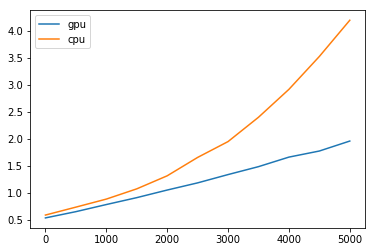

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(6,4)
plt.plot(i_set, gpu_set, label = 'gpu')
plt.plot(i_set, cpu_set, label = 'cpu')
plt.legend()

In [10]:
g = performanceTest("/gpu:0", 10000)

/gpu:0 size= 10000 Time: 2.511000156402588
